In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=935de8be44f17668ece31dda56ed268df2ace5b8e6d893e82008f2f80c55336b
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


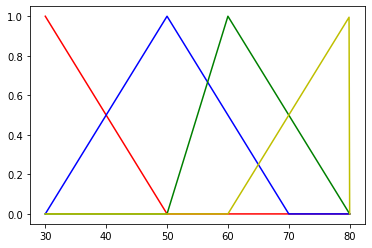

In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30, 80.1, 0.1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])
plt.plot(x, slow,'r', linewidth = 1.5, label = 'slow')
plt.plot(x, medium, 'b', linewidth = 1.5, label = 'medium')
plt.plot(x, medium_fast, 'g', linewidth = 1.5, label = 'medium_fast')
plt.plot(x, full_speed, 'y', linewidth = 1.5, label = 'full_speed')

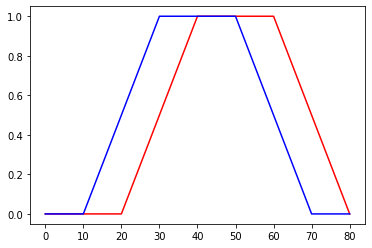

In [19]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(0, 80.1, 0.1)
slow = fuzz.trapmf(x,[20,40,60,80])
medium = fuzz.trapmf(x,[10,30,50,70])
#medium = fuzz.trimf(x,[30,50,70])
#medium_fast = fuzz.trimf(x,[50,60,80])
#full_speed = fuzz.trimf(x,[60,80,80])
plt.plot(x, slow,'r', linewidth = 1.5, label = 'slow')
plt.plot(x, medium,'b', linewidth = 1.5, label = 'medium')
#plt.plot(x, medium, 'b', linewidth = 1.5, label = 'medium')
#plt.plot(x, medium_fast, 'g', linewidth = 1.5, label = 'medium_fast')
#plt.plot(x, full_speed, 'y', linewidth = 1.5, label = 'full_speed')

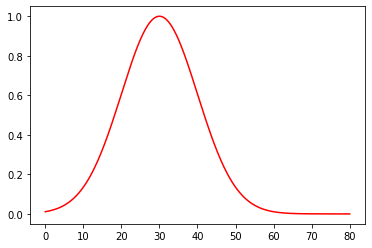

In [24]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(0, 80.1, 0.1)
slow = fuzz.gaussmf(x,30,10)

plt.plot(x, sl,'r', linewidth = 1.5, label = 'slow')
plt.plot(x, medium, 'b', linewidth = 1.5, label = 'medium')
plt.plot(x, medium_fast, 'g', linewidth = 1.5, label = 'medium_fast')
plt.plot(x, full_speed, 'y', linewidth = 1.5, label = 'full_speed')

FOOD & SERVICE & TIP

In [47]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11.1,0.1),'food')
ser = ctrl.Antecedent(np.arange(0,11.1,0.1), 'ser')
tip = ctrl.Consequent(np.arange(10,31.1,0.1),'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['aver'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

ser['poor'] = fuzz.trimf(ser.universe,[0,0,5])
ser['aver'] = fuzz.trimf(ser.universe,[0,5,10])
ser['good'] = fuzz.trimf(ser.universe,[5,10,10])

tip['poor'] = fuzz.trimf(tip.universe,[10,10,20])
tip['aver'] = fuzz.trimf(tip.universe,[10,20,30])
tip['good'] = fuzz.trimf(tip.universe,[20,30,30])

#food.view()
#ser.view()
#tip.view()
#food['poor'].view()

rule1 = ctrl.Rule(ser['poor'] & food['poor'], tip['0'])
rule2 = ctrl.Rule(ser['poor'] & food['aver'], tip['0'])
rule3 = ctrl.Rule(ser['poor'] & food['good'], tip['0'])
rule4 = ctrl.Rule(ser['aver'] & food['poor'], tip['5'])
rule5 = ctrl.Rule(ser['aver'] & food['aver'], tip['5'])
rule6 = ctrl.Rule(ser['aver'] & food['good'], tip['5'])
rule7 = ctrl.Rule(ser['good'] & food['poor'], tip['10'])
rule8 = ctrl.Rule(ser['good'] & food['aver'], tip['20'])
rule9 = ctrl.Rule(ser['good'] & food['good'], tip['30'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystem.Simulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['ser'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

ValueError: ignored

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11.1,0.1),'food')
ser = ctrl.Antecedent(np.arange(0,11.1,0.1), 'ser')
tip = ctrl.Consequent(np.arange(10,31.1,0.1),'tip')